# PyTorch Tutorial

Author: Kellen Sullivan

This is an introductory tutorial for the deep learning library PyTorch. PyTorch gives professional developers the tools to create and train their own custom neural networks, and is the most commonly used deep learning framework in research and academia.

In this tutorial, you will be taught the fundamentals of PyTorch, through building your own neural network to classify hand-written digits. For this task, you will use the MNIST dataset, which is a collection of thousands of hand written digits with corresponding lables. Below is a sample of 4 hand-written digits from the dataset and their corresponding labels.


![MNISTDataSetExample](https://media.geeksforgeeks.org/wp-content/uploads/20240430155943/download-(39).png)



While you work through this tutorial and its exercises, its highly encouraged to check out the provided lecture videos created by math youtuber 3Blue1Brown. He explains the math behind the deep learning concepts this tutorial will breifly introduce, and his tutorials reference the exact same neural network that you will be building! His lessons are available to watch or read for free with the following link: [3Blue1Brown Neural Networks Lectures](https://www.3blue1brown.com/topics/neural-networks)





## Getting Started

To get started using PyTorch, you first have to install it! To do so, open a new terminal and run the following command:

- If you are on Windows/Mac: `pip3 install torch torchvision`
- If you are on Linux: `pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cpu`

Note that these commands will use your CPU as the compute platform. If you have an NVIDIA GPU, you can install PyTorch with CUDA as the compute platform to greatly speed up training. Check out the official installation guide to learn more: https://pytorch.org/get-started/locally/

You can confirm PyTorch was successfully installed by importing the package and printing out its version.

In [1]:
import torch

print(torch.__version__)

2.8.0+cpu


## Tensors

A tensor is an array or matrix like datastructure, similar to a NumPy array, but with extra capabalities that make it ideal for deep learning. Tensors may only contain numerical values, and are homogeneous meaning all elements in a tensor must be the same datatype.

### Initializing a Tensor

Pytorch provides many ways to intialize a new tensor. ADD HERE

In [14]:
import numpy as np


# from a python list
t1 = torch.tensor([1,2,3])

# from a numpy array
np_arr = np.array([[1,2], [3,4]])
t2 = torch.from_numpy(np_arr)

print(f"Tensor from python list:\n{t1}\n")
print(f"Tensor from numpy array:\n{t2}\n")

Tensor from python list:
tensor([1, 2, 3])

Tensor from numpy array:
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)



You can also initialize a tensor using an existing tensor. The new tensor will have the same shape and datatype as the existing tensor, unless explicitly overwritten.

In [ ]:
# from an existing tensor
t3 = torch.ones_like(t2)
t4 = torch.zeros_like(t2)
t5 = torch.rand_like(t2, dtype=torch.float)

print(f"Tensor from t2 with all ones:\n{t3}\n")
print(f"Tensor from t2 with all zeros:\n{t4}\n")
print(f"Tensor from t2 with random values:\n{t5}")

Tensor from t2 with all ones:
tensor([[1, 1],
        [1, 1]], dtype=torch.int32)

Tensor from t2 with all zeros:
tensor([[0, 0],
        [0, 0]], dtype=torch.int32)

Tensor from t2 with random values:
tensor([[0.0267, 0.3853],
        [0.8086, 0.7023]], dtype=torch.float64)


Another common way to initialize a tensor is by providing the shape of the tensor.

In [17]:
t6 = torch.ones(2,2)
t7 = torch.zeros(2,3)

print(f"Tensor of all ones with dimensions 2x2:\n{t6}\n")
print(f"Tensor of all zeros with dimensions 2x3:\n{t7}")

Tensor of all ones with dimensions 2x2:
tensor([[1., 1.],
        [1., 1.]])

Tensor of all zeros with dimensions 2x3:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


Although there are many more ways to initialize a tensor, in order to keep this tutorial brief we won't introduce any more here. If you are curious, you can read the following Tensor guide: [Tensor Creation](https://docs.pytorch.org/docs/stable/torch.html#creation-ops)

### Attributes

Tensors have built in attributes that quickly provide machine learning engineers useful information about the tensors they constructed. Tensor attributes can be accessed with the notation `tensor.attribute`. There are over 1000 tensor attributes that you can read about [here](https://docs.pytorch.org/docs/stable/torch.html), but in this tutorial we will cover the following:
- `dtype`
- `shape`
- `device`

`dtype` returns the torch datatype of a tensor

In [27]:
t = torch.ones(2,4,3)
print(t)
print(f"\nDatatype: {t.dtype}")

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

Datatype: torch.float32


`shape` returns the dimensions of the tensor

In [28]:
print(t.shape)

torch.Size([2, 4, 3])


`device` returns the location a tensor is stored.

By default, tensors are stored on the CPU. However, PyTorch provides the ability to store tensors on an accelerator, such as a GPU, to greatly improve performance. Accelerators are designed to optimize operations performed on tensors and can be 10-100x faster than when performed on the CPU.

In [32]:
print(t.device)

cpu



To check if you have an accelerator available, you can use the function `torch.accelerator.is_available()` which returns True or False. If an accelerator is availble, you can determine the devices name using `torch.accelerator.current_accelerator()`, and then move the tensor onto the accelerator using the function `to(accelerator_device_name)`.

In this tutorial we will not assume you have an accelerator available to use, but the below commented out code shows how to use a tensor on an accelerator if the option is available.

In [ ]:
print(f"Accelerator is available: {torch.accelerator.is_available()}")

print(f"Device of available accelerator: {torch.accelerator.current_accelerator()}")

# Move an existing tensor onto an accelerator
# t = t.to(torch.accelerator.current_accelerator())

# Initialize a new tensor onto an accelerator using the optional device argument
# t1 = torch.tensor([1,2,3], device='cuda')

False
None


### Operations

- indexing and slicing (say numpy like and don't go too in-depth)
- multiplying math (brief mention)
- item
- highlight softmax and argmax


## Handling Data

The first step in creating a neural network is loading the data. Thankfully, PyTorch provides many tools to make loading and iterating through data simple!

### Datasets

Torchvision is library often used alongside PyTorch to support computer vision tasks. It also contains built-in datasets that can be easily loaded in and used to train neural networks in PyTorch, including the MNIST dataset that we will be training a model on!

To load in the MSNIST dataset, we must first import the datasets submodule from torchvision. We also import ToTensor from the transforms submodule which will be used to transform the handwritten digit images into PyTorch Tensors.

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

Now, we can use the following code to load in MNIST dataset. PROBABLY WANT TO REORDER SOME OF THE MARKDOWN / MOVE SOME OF IT INTO COMMENTS

In [4]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9.91M/9.91M [01:11<00:00, 139kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.19MB/s]
100%|██████████| 1.65M/1.65M [00:03<00:00, 491kB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


We load training data and testing data separately, that way we can train the model using the training data and then test it on never before seen data, to ensure the model is indeed learning how to classify digits and not just memorizing the training dataset. 

`training_data` is a set of 60,000 handwritten digit images with their corresponding labels (0-9)

`test_data` is a set of 10,000 handwritten digit images with their corresponding labels (0-9) DOUBLE CHECK THIS IS TRUE

Don't worry too much about the parameters for loading in data now, but briefly:
- `root` is the path where the train/test data is stored
- `train` specifies training or test dataset
- `download` if true, dowloads the data from the internet if it's not available at `root`.
- `transform` specify the feature and label transformations

We can look at the first image in the training data set using the following code: 

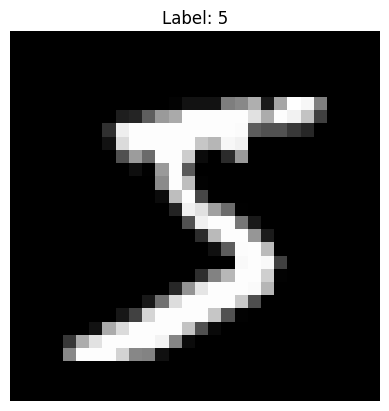

In [15]:
import matplotlib.pyplot as plt

img, label = training_data[0]
plt.imshow(img.squeeze(), cmap="gray") 
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

### DataLoader

When training and testing the model, we will repeatedly need to iterate through our datasets. In order to optimize the process, we would like to handle batching, shuffling the data, and loading it in parrallel. Thankfully, PyTorch provides DataLoaders to make this process easy.

The following code creates two DataLoaders, one for each dataset.

In [5]:
train_loader = torch.utils.data.DataLoader(
    training_data,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

Again don't worry too much about the parameters, but briefly: 
- `batch_size` is how many samples are loaded in each iteration
- `shuffle` is whether to randomly suffle the data
- `num_workers` is how many subprocesses to use for data loading (parrallelization)

After creating a DataLoader, you can get a batch of samples by calling `next(iter(dataloader_name))`. MAYBE REWRITE THIS

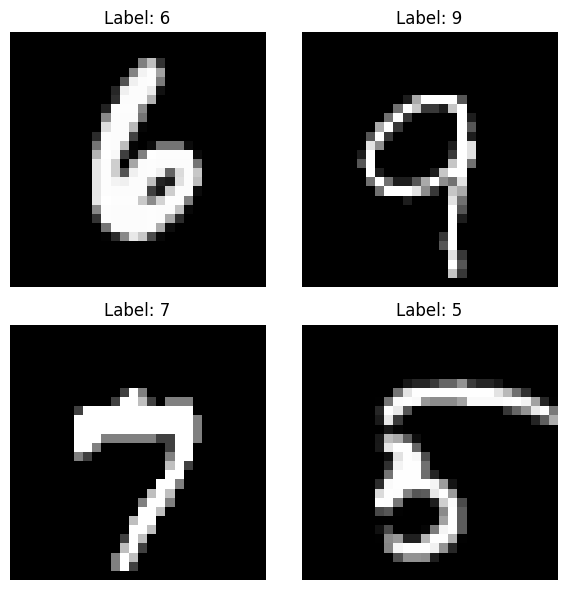

In [11]:
# Get one batch of training samples
train_features, train_labels = next(iter(train_loader))

# Plot all 4 images
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    img = train_features[i].squeeze() 
    label = train_labels[i].item()
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.tight_layout()
plt.show()

## Constructing a Neural Network

### Modules

### Activation Functions

### Init and Forward Function

## Loss Functions

## Optimizers

## Training and Using a Neural Network

## Save and Export a Model

## Conclusion and Further Readings